# 探索变量间的关系
比统计更直观呢~

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "regression")))
tips = pd.read_csv("D:/bigdata_github/Python_Course_by_Bokkin/course/class5_Seaborn/tips.csv") # 餐厅小费案例
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 绘制线性回归模型
* 最简单的方式：散点图 + 线性回归 + 95%置信区间
* 小费收入与餐厅消费成正比

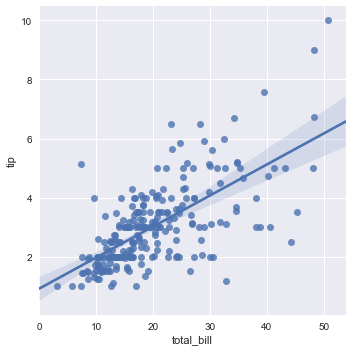

In [11]:
sns.lmplot(x="total_bill", y="tip", data=tips) # confidence interval

对于变量离散取值，散点图就显得有些尴尬了。。。

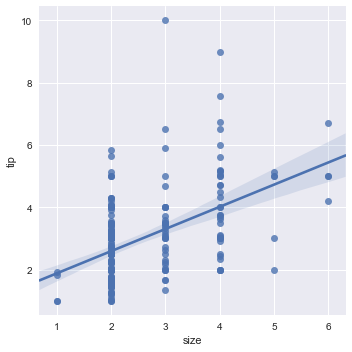

In [12]:
sns.lmplot(x="size", y="tip", data=tips)

方法1：加个小的抖动

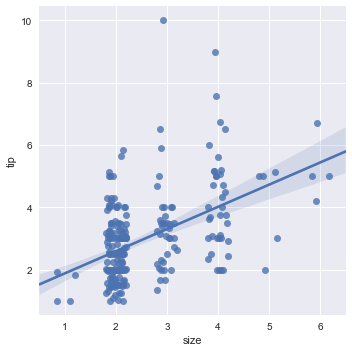

In [13]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.2)

方法2：离散取值上用均值和置信区间代替散点

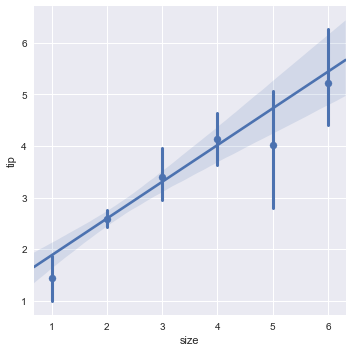

In [14]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## 拟合不同模型
有些时候线性拟合效果不错，有些时候差强人意~

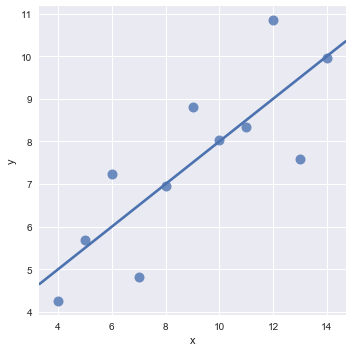

In [16]:
# 1973年统计学家Anscombe构造出的4组数据
# ci：confidence intervals
# kws：key word arguments
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 100}) # s表示size

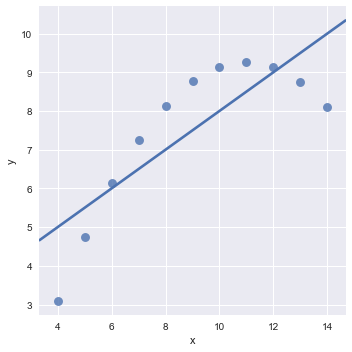

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80})

试试高阶拟合~

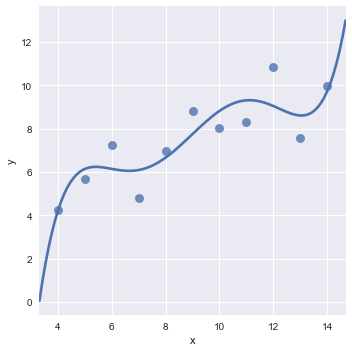

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), order=5, ci=None, scatter_kws={"s": 80})

异常值肿么办？

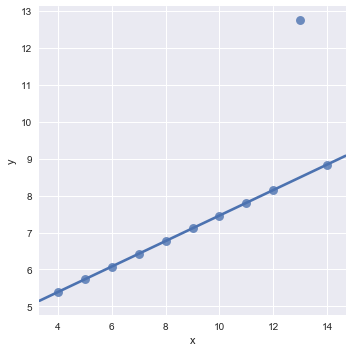

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

二值变量如何拟合？

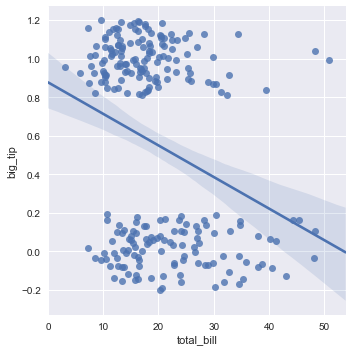

In [20]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15 # 比例超过15%的消费
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=0.2)

尝试逻辑回归~
* $y = F(kx+b)$
* $F(x) = \frac{1}{1+e^{-x}}$

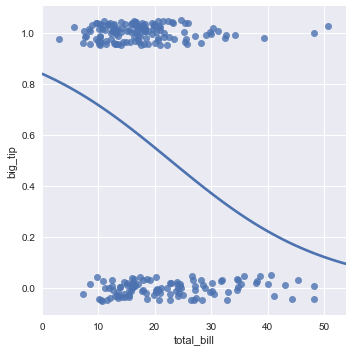

In [21]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.05, ci=None)

如何评价拟合效果？残差曲线~

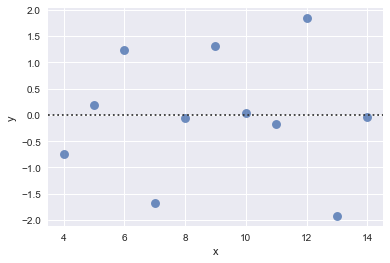

In [22]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80}) # residue plot

* 拟合的好，就是白噪声的分布$N(0,\sigma^2)$
* 拟合的差，就能看出一些模式

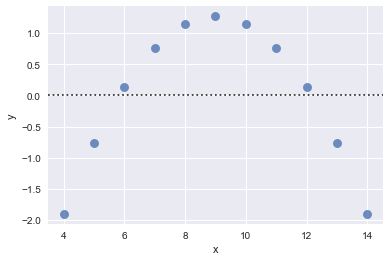

In [23]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), scatter_kws={"s": 80})

## 变量间的条件关系摸索

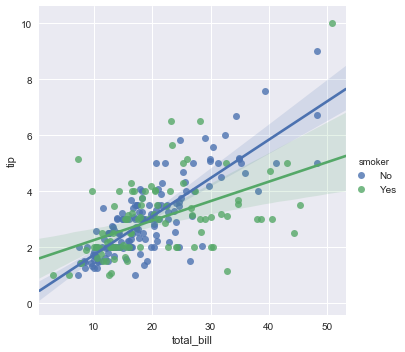

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

不抽烟的人似乎更喜欢给小费哦~

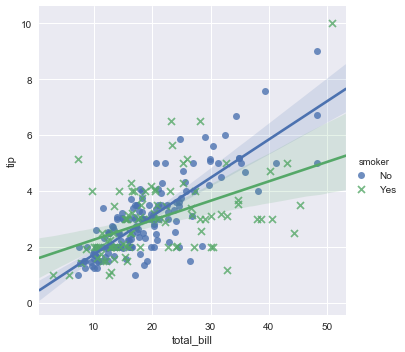

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"])

尝试增加更多的分类条件

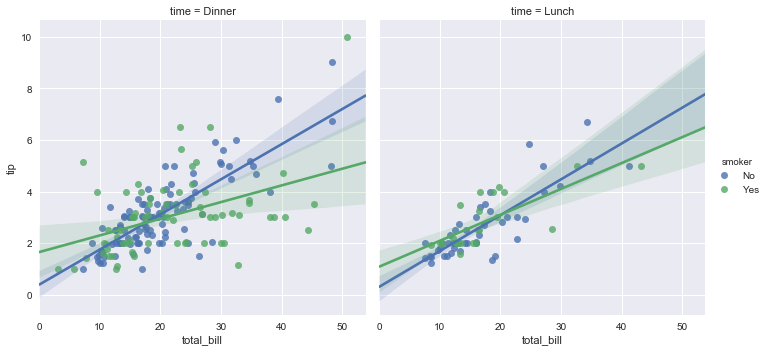

In [26]:
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) # col: column

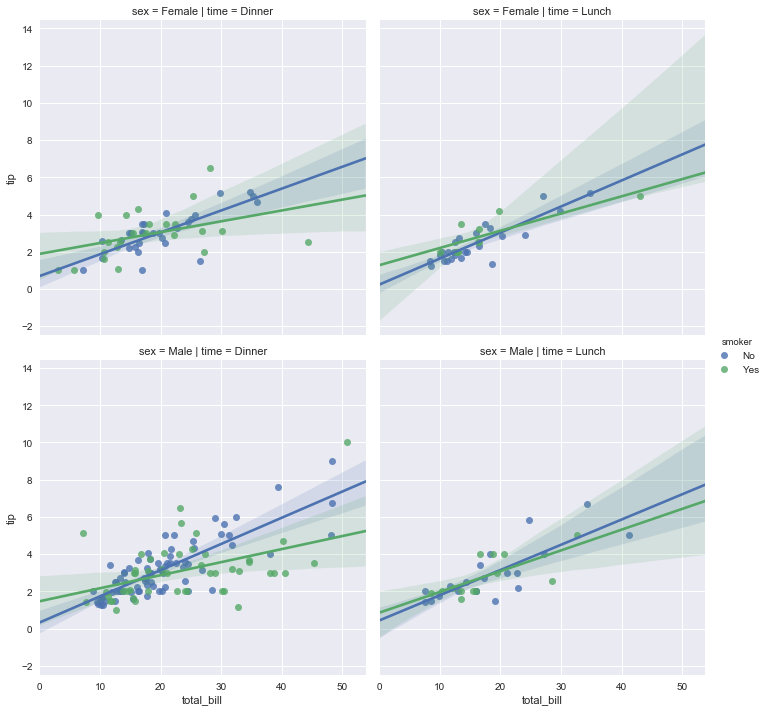

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)

* 不抽烟的人给的小费更多
* 抽烟的人给的小费更分散
* 女性相比男性小费更分散

## 控制图片的大小和形状

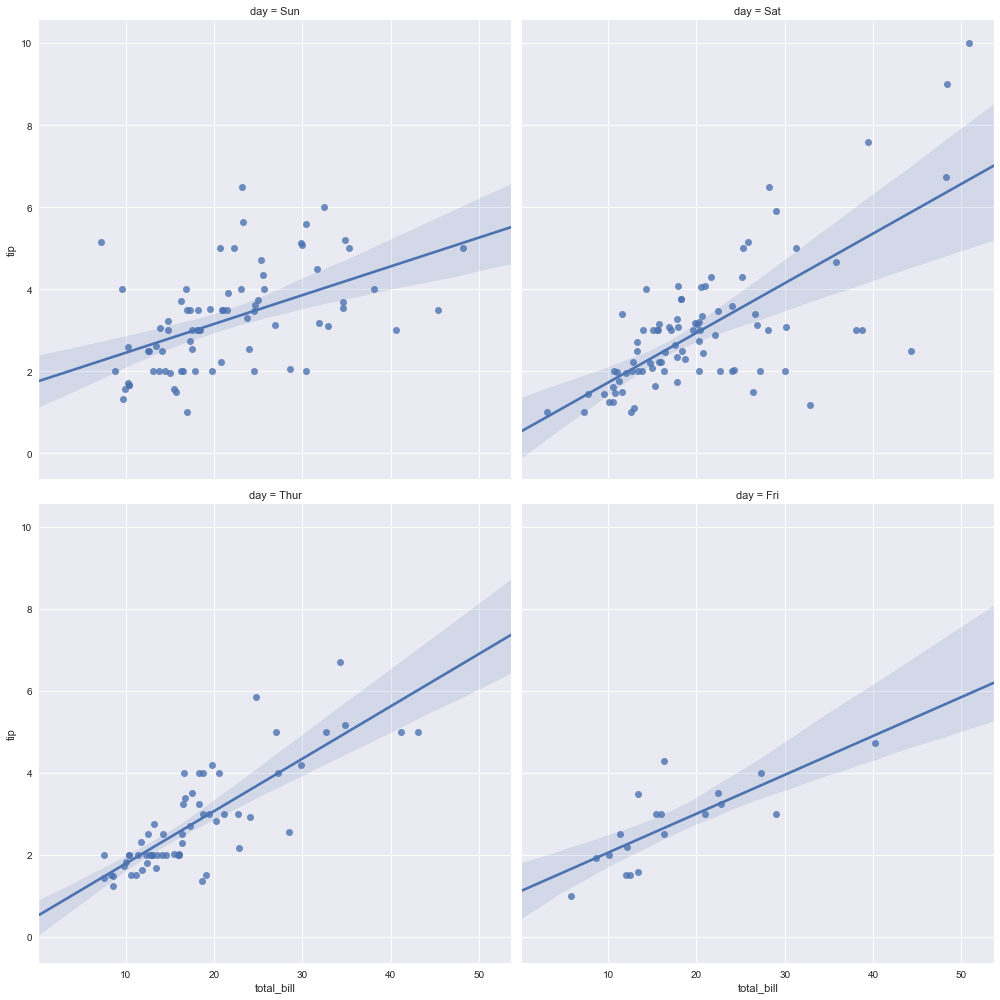

In [28]:
# col_wrap：控制每行多少个图
# size：控制图片高度（inch）
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, size=7) # col_wrap=1为什么会有问题？

看起来似乎周六比周日的小费更多哈~

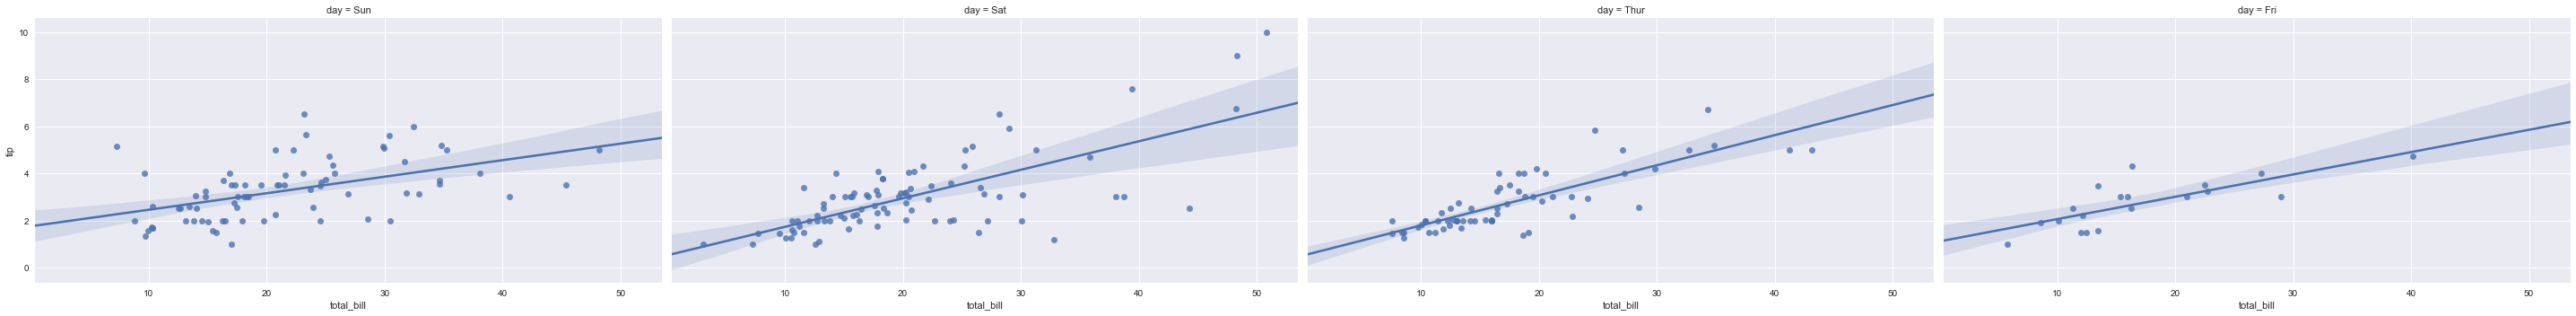

In [30]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=2) # aspect：控制切面的缩放比例

## 小结
* 拟合曲线：lmplot(x, y, data, ci, x_estimator, robust, logistic)
* 残差曲线：residplot()
* 子图绘制：lmplot(row, col)
* 尺寸控制：lmplot(col_wrap, size, aspect)

## 课后小题
* lmplot和regplot的区别